In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv("./cardekho.csv", index_col=[0])

In [68]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [70]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [71]:
# 1. Data Cleaning

In [72]:
# 1.1 Handling Typographical Errors

In [73]:
# Printing unique entries in all categorical columns
# Getting a list of all categorical columns
cat_cols = df.select_dtypes('object').columns.to_list()
# Printing unique entries to check for data entry errors
for column in cat_cols:
    print(df[column].value_counts(), end="\n\n")

car_name
Hyundai i20              906
Maruti Swift Dzire       890
Maruti Swift             781
Maruti Alto              778
Honda City               757
                        ... 
Mercedes-AMG C             1
Rolls-Royce Ghost          1
Maserati Quattroporte      1
Isuzu MUX                  1
Force Gurkha               1
Name: count, Length: 121, dtype: int64

brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari   

In [74]:
# 1.2 Handling Missing Values

In [75]:
# Checking for null values
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [76]:
# 1.3 Handling Duplicates

In [77]:
df[df.duplicated(keep=False)]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
31,Maruti Swift Dzire,Maruti,Swift Dzire,6,90000,Individual,Diesel,Manual,26.59,1248,74.00,5,600000
90,Honda City,Honda,City,8,70000,Individual,Petrol,Manual,16.80,1497,116.30,5,545000
210,Maruti Alto,Maruti,Alto,2,25000,Individual,Petrol,Manual,24.70,796,47.30,5,310000
261,Honda City,Honda,City,8,70000,Individual,Petrol,Manual,16.80,1497,116.30,5,545000
281,Renault KWID,Renault,KWID,4,35000,Individual,Petrol,Automatic,24.04,999,67.00,5,350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19311,Maruti Swift,Maruti,Swift,8,80000,Individual,Diesel,Manual,22.90,1248,74.00,5,350000
19434,Maruti Wagon R,Maruti,Wagon R,6,50000,Individual,CNG,Manual,26.60,998,58.16,5,450000
19489,Tata Tiago,Tata,Tiago,4,30000,Individual,Petrol,Manual,23.84,1199,84.00,5,350000
19505,Hyundai Grand,Hyundai,Grand,6,30000,Individual,Petrol,Manual,18.90,1197,82.00,5,450000


In [78]:
# Dropping duplicate rows
df = df.drop_duplicates(keep='first', ignore_index=True)

In [79]:
# Final check for duplicates
df[df.duplicated(keep=False)].shape

(0, 13)

In [80]:
# 1.4 Handling Datatypes

In [81]:
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [82]:
cat_cols

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [83]:
df[cat_cols] = df[cat_cols].astype('category')
df[cat_cols].dtypes

car_name             category
brand                category
model                category
seller_type          category
fuel_type            category
transmission_type    category
dtype: object

In [84]:
# 2. Train Test Split

In [85]:
# Independent Features
X = df.drop(columns='selling_price', axis=1)
# Dependent Features
y = df['selling_price']

In [86]:
X.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [87]:
y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((12195, 12), (3049, 12))

In [90]:
# 3. Features Encoding

In [91]:
# Calculating number of unique classes in cateegorical features
unique_values = df[cat_cols].nunique()
unique_values# Train Test Split

car_name             121
brand                 32
model                120
seller_type            3
fuel_type              5
transmission_type      2
dtype: int64

In [92]:
# OneHotEncoder : seller_type, fuel_type, transmission_type have low number of unique values. They can be OneHotEncoded
# OrdinalEncoder: car_name, brand and model have higher number of unique features. They have to be encoded using OrdinalEncoder

In [93]:
# OneHotEncoder columns
onehot_cols = unique_values[unique_values <= 5].index.to_list()
# Ordinal Encoder Columns
ordinal_cols = unique_values[unique_values > 5].index.to_list()

onehot_cols, ordinal_cols

(['seller_type', 'fuel_type', 'transmission_type'],
 ['car_name', 'brand', 'model'])

In [94]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer 

In [95]:
# Initializing Column Transformer
pre_processor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_cols),
                                               ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_cols)], remainder='passthrough', n_jobs=-1)

In [96]:
# Pre-processing X_train
X_train = pre_processor.fit_transform(X_train)

In [97]:
# Pre-processing X_test
X_test = pre_processor.transform(X_test)

In [98]:
encoded_cols = pre_processor.get_feature_names_out()
encoded_cols

array(['onehot__seller_type_Individual',
       'onehot__seller_type_Trustmark Dealer', 'onehot__fuel_type_Diesel',
       'onehot__fuel_type_Electric', 'onehot__fuel_type_LPG',
       'onehot__fuel_type_Petrol', 'onehot__transmission_type_Manual',
       'ordinal__car_name', 'ordinal__brand', 'ordinal__model',
       'remainder__vehicle_age', 'remainder__km_driven',
       'remainder__mileage', 'remainder__engine', 'remainder__max_power',
       'remainder__seats'], dtype=object)

In [99]:
# Making X_train and X_test pandas dataframes
X_train = pd.DataFrame(X_train, columns = encoded_cols)
X_test = pd.DataFrame(X_test, columns = encoded_cols)
X_train.head()

,onehot__seller_type_Individual,onehot__seller_type_Trustmark Dealer,onehot__fuel_type_Diesel,onehot__fuel_type_Electric,onehot__fuel_type_LPG,onehot__fuel_type_Petrol,onehot__transmission_type_Manual,ordinal__car_name,ordinal__brand,ordinal__model,remainder__vehicle_age,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power,remainder__seats
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72.0,18.0,42.0,5.0,41974.0,24.52,1248.0,88.50,7.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,78.0,18.0,99.0,16.0,90000.0,14.00,1061.0,64.00,5.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,114.0,30.0,94.0,10.0,80000.0,20.54,1598.0,103.60,5.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100.0,27.0,86.0,8.0,55572.0,13.70,1798.0,157.75,5.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,95.0,25.0,64.0,4.0,110000.0,23.01,999.0,67.00,5.0


In [100]:
X_train.dtypes

onehot__seller_type_Individual          float64
onehot__seller_type_Trustmark Dealer    float64
onehot__fuel_type_Diesel                float64
onehot__fuel_type_Electric              float64
onehot__fuel_type_LPG                   float64
onehot__fuel_type_Petrol                float64
onehot__transmission_type_Manual        float64
ordinal__car_name                       float64
ordinal__brand                          float64
ordinal__model                          float64
remainder__vehicle_age                  float64
remainder__km_driven                    float64
remainder__mileage                      float64
remainder__engine                       float64
remainder__max_power                    float64
remainder__seats                        float64
dtype: object

In [101]:
# Changing data types of ordinal columns to category
ordinal_columns = X_train.filter(like='ordinal').columns.tolist()
X_train[ordinal_columns] = X_train[ordinal_columns].astype('category')
X_test[ordinal_columns] = X_test[ordinal_columns].astype('category')
X_train.dtypes

onehot__seller_type_Individual           float64
onehot__seller_type_Trustmark Dealer     float64
onehot__fuel_type_Diesel                 float64
onehot__fuel_type_Electric               float64
onehot__fuel_type_LPG                    float64
onehot__fuel_type_Petrol                 float64
onehot__transmission_type_Manual         float64
ordinal__car_name                       category
ordinal__brand                          category
ordinal__model                          category
remainder__vehicle_age                   float64
remainder__km_driven                     float64
remainder__mileage                       float64
remainder__engine                        float64
remainder__max_power                     float64
remainder__seats                         float64
dtype: object

In [102]:
y_train.dtypes

dtype('int64')

In [103]:
# 4. Random Forest Model

In [104]:
X_train.dtypes

onehot__seller_type_Individual           float64
onehot__seller_type_Trustmark Dealer     float64
onehot__fuel_type_Diesel                 float64
onehot__fuel_type_Electric               float64
onehot__fuel_type_LPG                    float64
onehot__fuel_type_Petrol                 float64
onehot__transmission_type_Manual         float64
ordinal__car_name                       category
ordinal__brand                          category
ordinal__model                          category
remainder__vehicle_age                   float64
remainder__km_driven                     float64
remainder__mileage                       float64
remainder__engine                        float64
remainder__max_power                     float64
remainder__seats                         float64
dtype: object

In [105]:
y_train.dtypes

dtype('int64')

In [106]:
# Random Forest Model

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [108]:
sample_model = RandomForestRegressor(random_state=42, n_jobs=-1)

In [109]:
sample_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [110]:
sample_y_pred = sample_model.predict(X_test)

In [111]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [115]:
sample_r2 = r2_score(y_test, sample_y_pred)

In [116]:
print("Accuracy",sample_r2)

Accuracy 0.8731537046469302


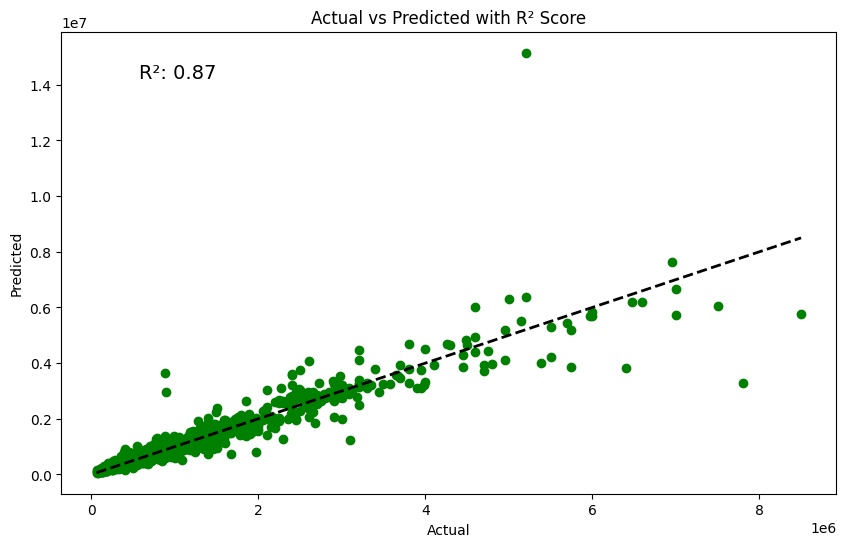

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, sample_y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.text(0.1, 0.9, f'R²: {sample_r2:.2f}', fontsize=14, transform=plt.gca().transAxes)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted with R² Score')
plt.show()

In [121]:
sample_rmse = np.sqrt(mean_squared_error(y_test, sample_y_pred))

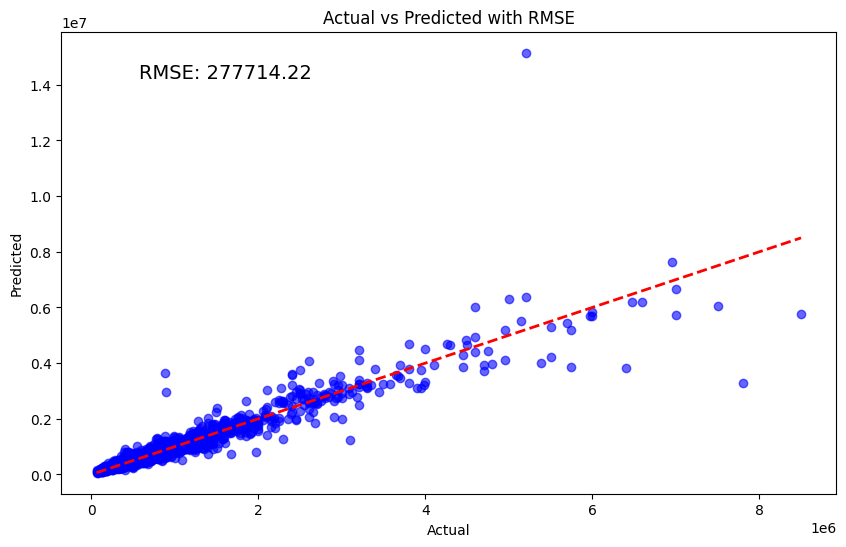

In [123]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, sample_y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.text(0.1, 0.9, f'RMSE: {sample_rmse:.2f}', fontsize=14, transform=plt.gca().transAxes)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted with RMSE')
plt.show()